Running manual bilateral filter... (This might take a few seconds)
Done.


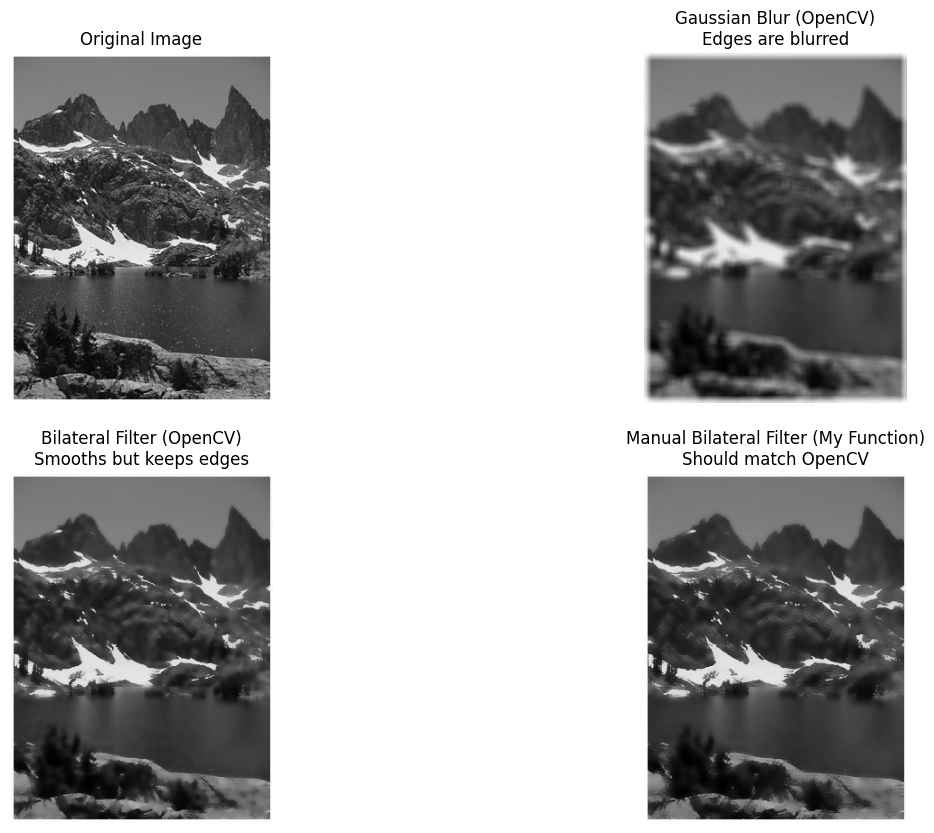

Average difference per pixel: 1.5645


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# PART 10(a): Manual Bilateral Filter Function
# ==========================================
def manual_bilateral_filter(image, d, sigma_s, sigma_r):
    src = image.astype(np.float64)
    h, w = src.shape
    pad = d // 2
    
    padded_src = cv.copyMakeBorder(src, pad, pad, pad, pad, cv.BORDER_REFLECT)
    filtered_image = np.zeros_like(src)
    normalization_factor = np.zeros_like(src)
    
    coords = np.arange(-pad, pad + 1)
    xx, yy = np.meshgrid(coords, coords)
    
    spatial_kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma_s**2))
    
    for i in range(d):
        for j in range(d):
            gs = spatial_kernel[i, j]
            neighbor_img = padded_src[i : i + h, j : j + w]
            diff = neighbor_img - src
            gr = np.exp(-(diff**2) / (2 * sigma_r**2))
            weight = gs * gr
            filtered_image += neighbor_img * weight
            normalization_factor += weight
    output = filtered_image / normalization_factor
    
    return output.astype(np.uint8)

# ==========================================
# MAIN EXECUTION: Parts 10(b), 10(c), 10(d)
# ==========================================

img = cv.imread('media/filter_input.jpg', cv.IMREAD_GRAYSCALE)

if img is None:
    print("Error loading image")
else:
    d = 9          # Diameter
    sigma_s = 50   # Spatial Sigma (Large blur amount)
    sigma_r = 50   # Range Sigma (How strictly to keep edges)

    # --- 10(b) Gaussian Smoothing (OpenCV) ---
    # Note: Gaussian only takes sigma_s (spatial). Range doesn't matter.
    gaussian_cv = cv.GaussianBlur(img, (d, d), sigma_s)

    # --- 10(c) Bilateral Filtering (OpenCV) ---
    bilateral_cv = cv.bilateralFilter(img, d, sigma_r, sigma_s)

    # --- 10(d) Manual Bilateral Filter ---
    print("Running manual bilateral filter... (This might take a few seconds)")
    bilateral_manual = manual_bilateral_filter(img, d, sigma_s, sigma_r)
    print("Done.")

    # --- Display & Comparison ---
    plt.figure(figsize=(15, 10))

    # Row 1: Original vs Gaussian
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(gaussian_cv, cmap='gray')
    plt.title(f"Gaussian Blur (OpenCV)\nEdges are blurred")
    plt.axis('off')

    # Row 2: Bilateral OpenCV vs Manual
    plt.subplot(2, 2, 3)
    plt.imshow(bilateral_cv, cmap='gray')
    plt.title(f"Bilateral Filter (OpenCV)\nSmooths but keeps edges")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(bilateral_manual, cmap='gray')
    plt.title(f"Manual Bilateral Filter (My Function)\nShould match OpenCV")
    plt.axis('off')

    plt.show()

    # Optional: Verify difference numerically
    diff = cv.absdiff(bilateral_cv, bilateral_manual)
    print(f"Average difference per pixel: {np.mean(diff):.4f}")